# PRÁCTICA 2 TIV

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import data, util, exposure, color, feature
from PIL import Image


### 1) Leer y visualizar la imagen gray_bands.tif

<class 'str'>
2576321151104


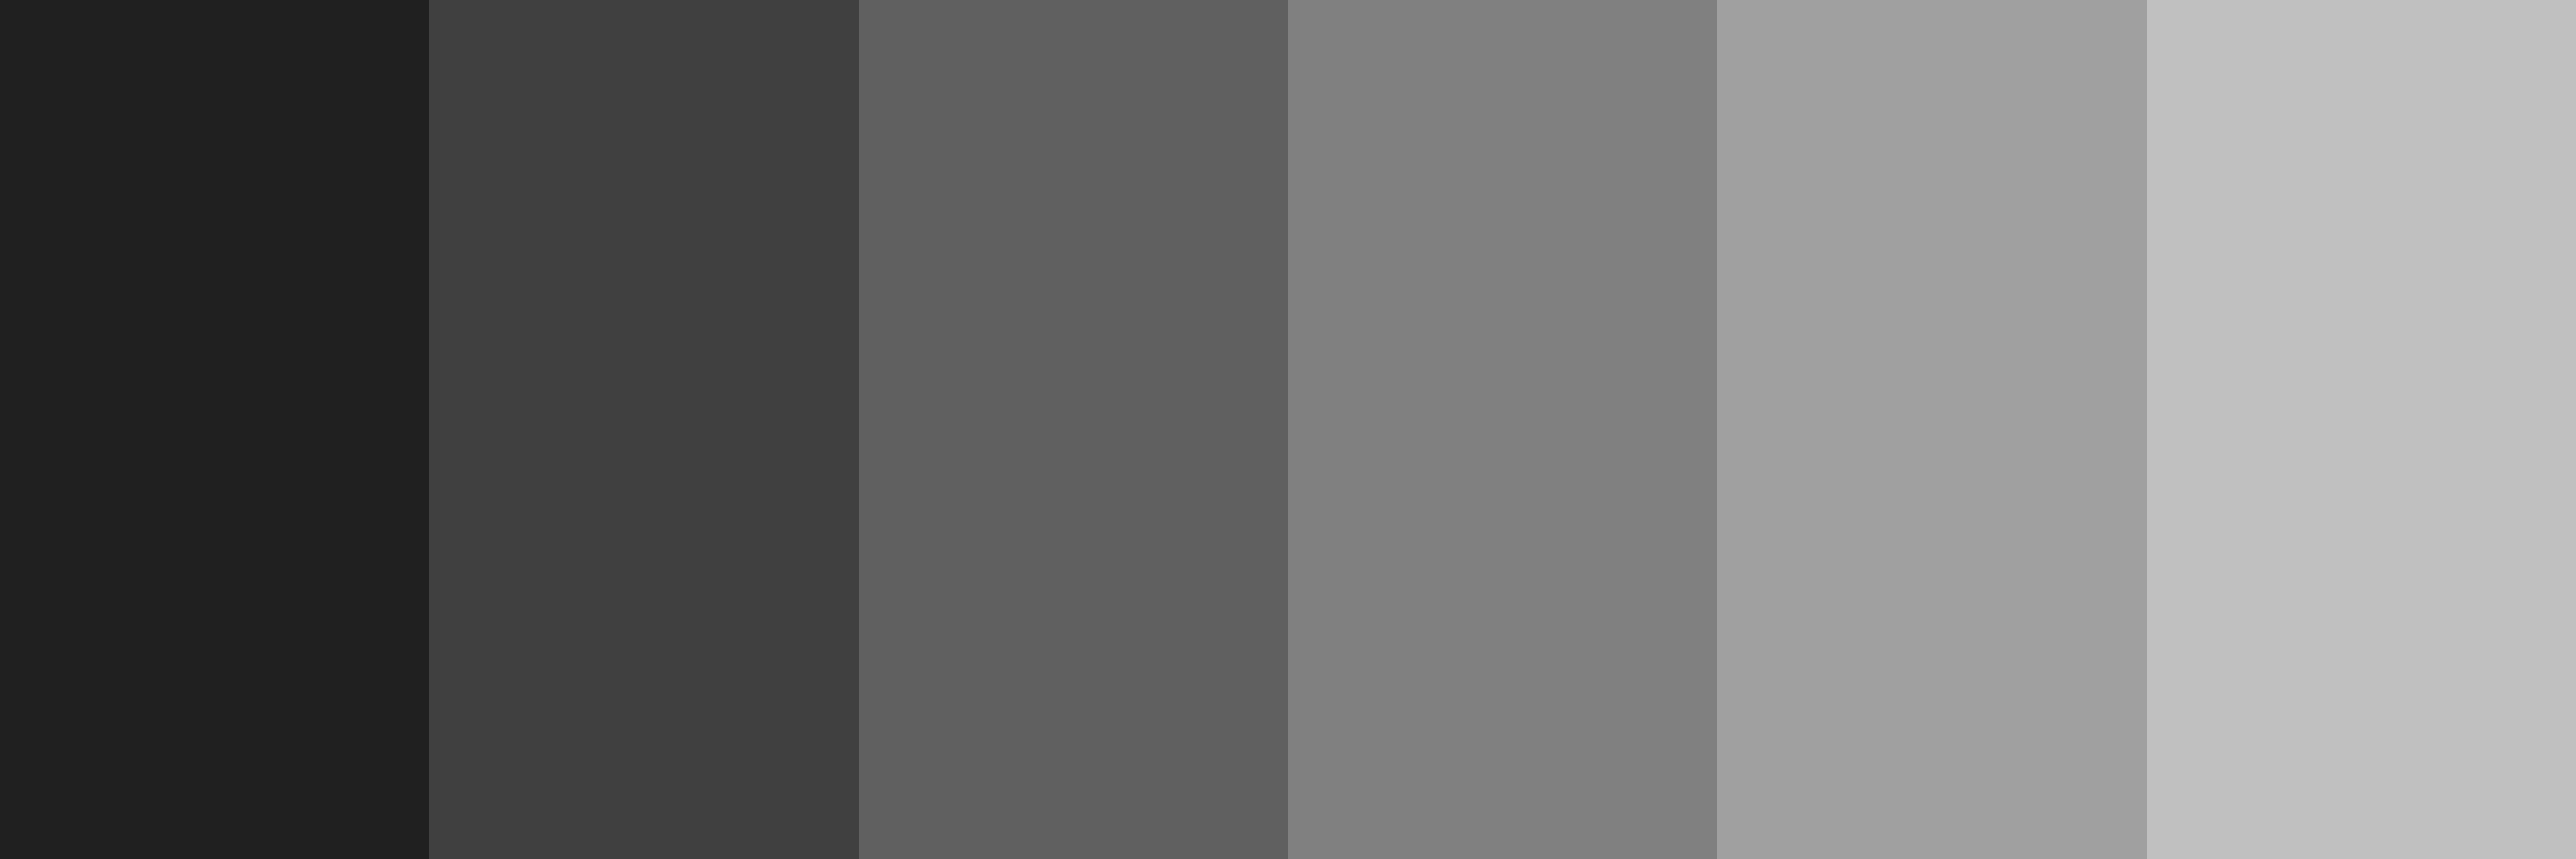

(7200, 2400)


In [12]:
file = 'images/gray_bands.tif'
print(type(file))
print(id(file))

ImgGray  = Image.open(file)
display(ImgGray)
print(ImgGray.size)

Debido a que a la hora de aplicar el ruido Gaussiano en el apartado 4), la imagen es demasiado grande para ver el efecto del filtro, vamos a disminuir el tamaño de la imagen para poder ver la implementación de filtro.Haciendo este proceso ahora, nos evitamos tener que transformar de nuevo la imagen para reducirla.

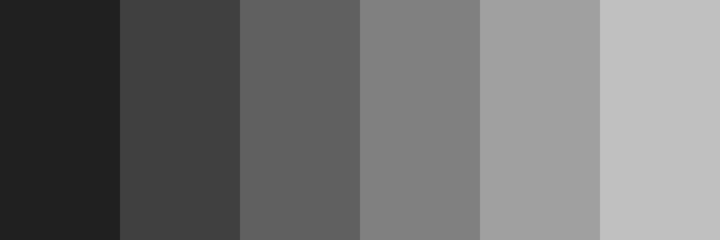

In [3]:
img_final = ImgGray.resize(size=(720,240))
display(img_final)

 A continuación convertimos a array de numpy de tipo float para poder aplicarle las transformaciones y poder manejar la imagen


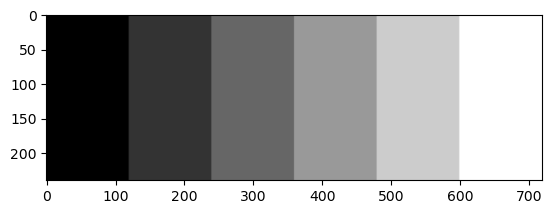

In [51]:
plt.figure()
plt.imshow(img_final , cmap='gray')

img  = np.array(img_final , dtype='float')
img  = img /255
#Al dividir ahora, luego hay que tener en cuenta que la desviación típica tendrá que ser menor que 1, puesto que ahora
#los valores de nuestra imagen están entre 0 y 1

### 2) Detectar y representar los bordes con un operador de gradiente

In [52]:
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

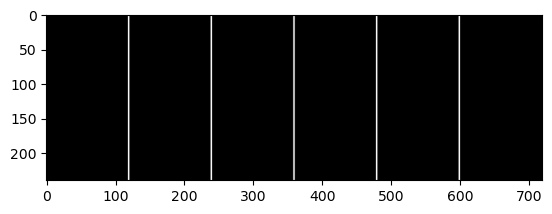

In [53]:
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)

img_prewitt = np.sqrt(img_gx**2 + img_gy**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

Text(0.5, 1.0, 'Parcial en y')

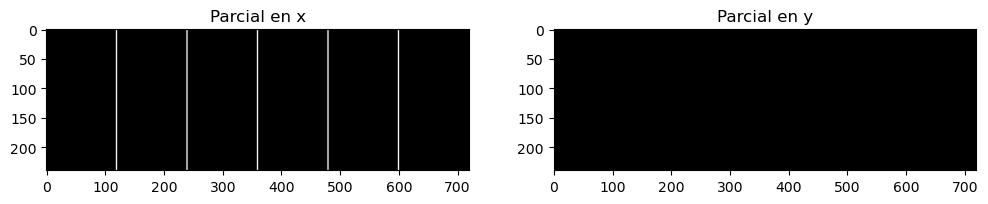

In [54]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(img,1), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(prewitt(img,0), cmap='gray')
plt.title('Parcial en y')

Como vemos, en el eje Y, el gradiente no detecta ningún borde, eso es porque en este caso, la imagen solo tiene diferencia o cambios de color representados en vertical, por lo tanto los cambios de tonos de grises se detectan en el eje X

### 3) Detectar y representar los bordes con un operador de laplaciana

Ahora detectaremos los bordes pero mediante las segundas derivadas laplacianas

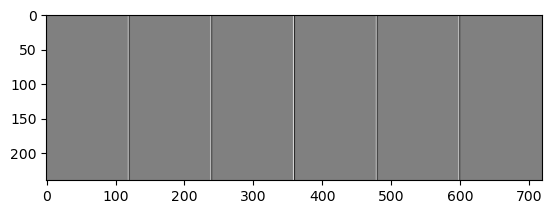

In [55]:
img_lpl = laplace(img)
plt.imshow(img_lpl, cmap='gray')

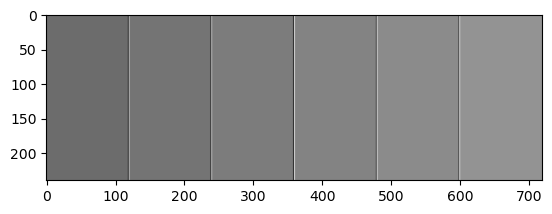

In [60]:
alpha=20#Este valor puede variar entre 0 y 255, así observaremos el efecto 
img_realz = img - alpha*img_lpl

plt.imshow(img_realz, cmap='gray')

### 4) Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable por el usuario. Representar las imágenes

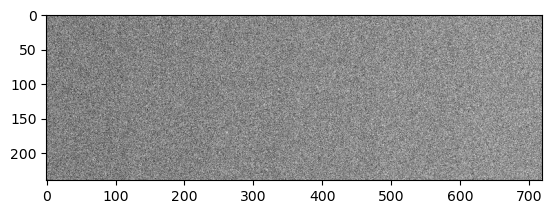

In [61]:
ruido = np.random.normal(0.0, 1, img.shape)
imgN = ruido + img
plt.imshow(imgN, cmap='gray')

En mi caso he dicidido darle un valor de 0.5 a la desviación típica de la imagen, así pues podemos ver la imagen de grises de fondo. Como vemos, la imagen está cubiera de ruido y si la desviación del ruido fuera mayor, de su valor máximo 1, veriamos como dejaría de verse por completo la imagen real.

#### 5) Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas. ¿Podemos detectar los bordes? Discutir el resultado

Vamos a probar con la imagen del edificio que tiene una gran exposición de luz solar y le aplicaremos los operadores comentados. Seguiremos el mismo proceso que con la imagen anterior, con la diferencia de que los bordes de estas imágenes no están tan definidos

<class 'str'>
2574848893856


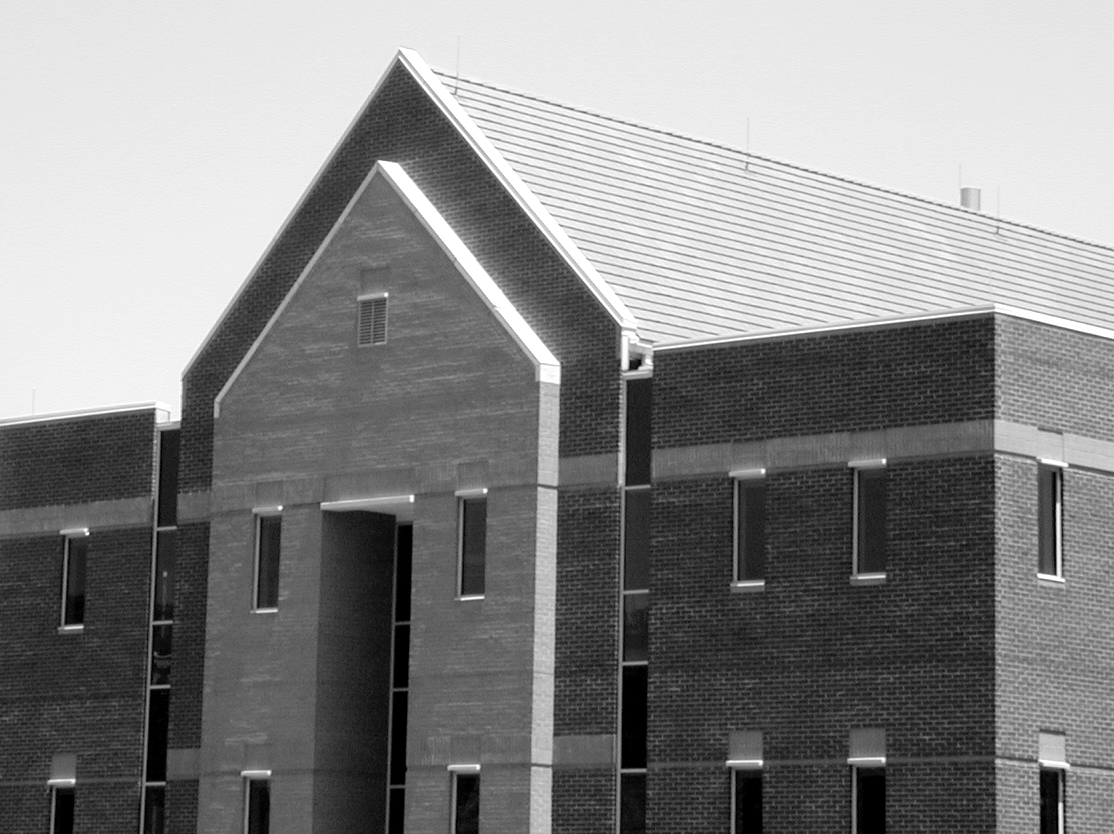

<class 'str'>
2574848893936


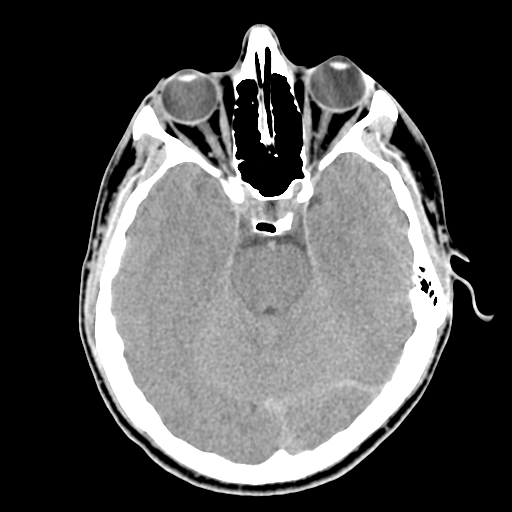

In [204]:
file = 'images/building.tif'
print(type(file))
print(id(file))

ImgBuild  = Image.open(file)
display(ImgBuild)

file = 'images/head_CT.tif'
print(type(file))
print(id(file))

ImgCT  = Image.open(file)
display(ImgCT)

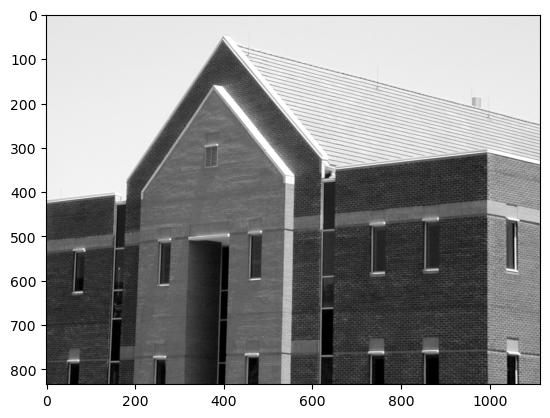

In [205]:
#Convertimos a numpy
plt.figure()
plt.imshow(ImgBuild , cmap='gray')

img  = np.array(ImgBuild , dtype='float')
img  = img /255

A continuación, veremos la detección de los bordes debido al cambio entre formas y tonos distintos de la imagen y utilizaremos el operador de gradiente de prewitt

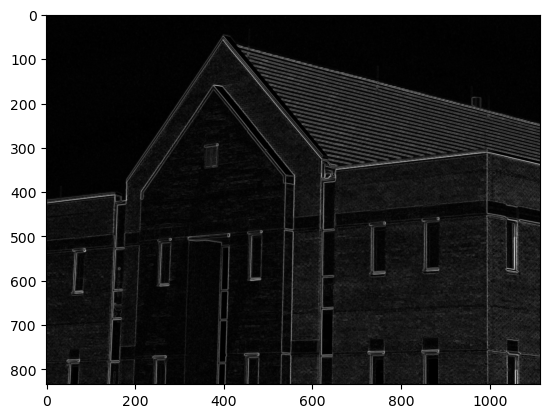

In [206]:
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)

img_prewitt = np.sqrt(img_gx**2 + img_gy**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

Text(0.5, 1.0, 'Parcial en y')

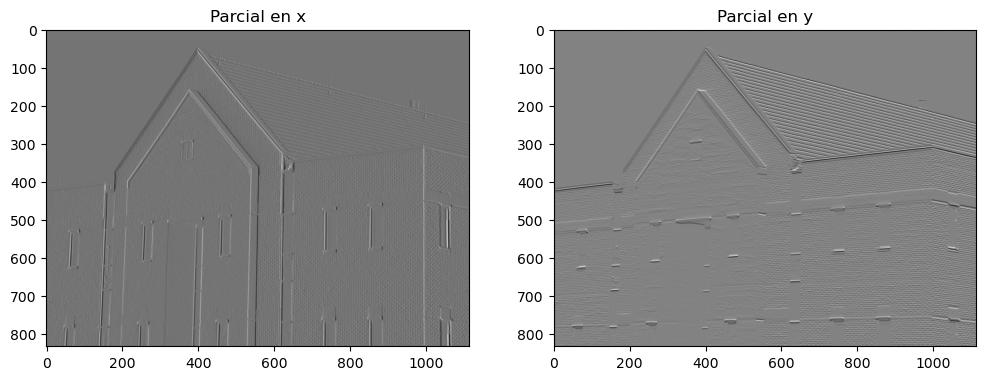

In [207]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(img,1), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(prewitt(img,0), cmap='gray')
plt.title('Parcial en y')

Ahora comparemos la detección de bordes mediante laplacianas

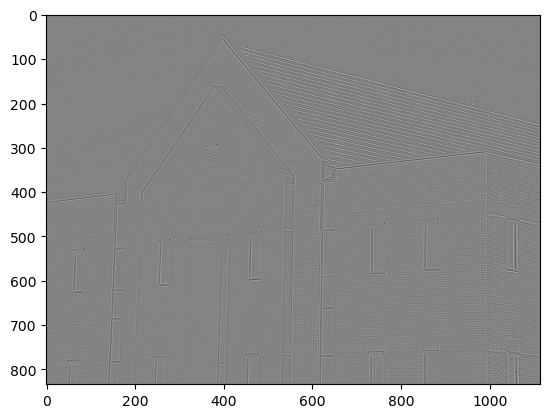

In [208]:
img_lpl = laplace(img)
plt.imshow(img_lpl, cmap='gray')

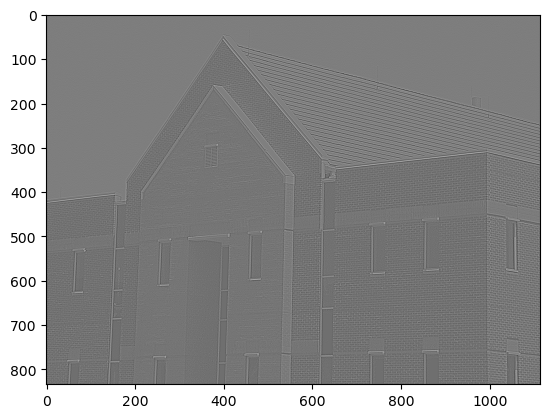

In [209]:
alpha=10 
#Este valor puede variar entre 0 y 255, así observaremos el efecto, a mayor nivel de alpha,
# mayor es el efecto de la difuminación del borde mediante la laplaciana
img_real = img - alpha*img_lpl

plt.imshow(img_real, cmap='gray')

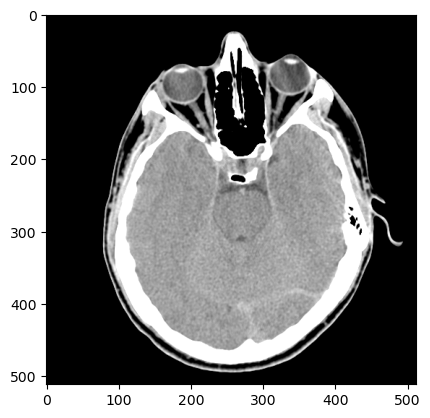

In [210]:
#convertimos a numpy
plt.figure()
plt.imshow(ImgCT , cmap='gray')

img1  = np.array(ImgCT , dtype='float')
img2 = img1 /255

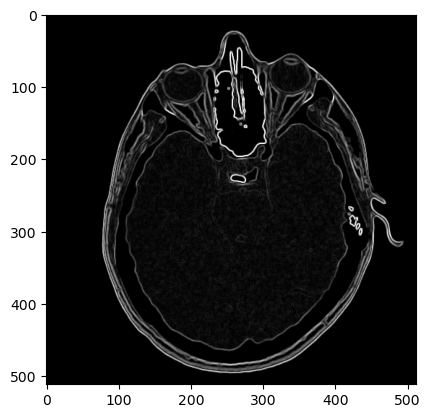

In [211]:
img_gx2 = convolve(img2, gx)
img_gy2 = convolve(img2, gy)

img_prewitt = np.sqrt(img_gx2**2 + img_gy2**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

Text(0.5, 1.0, 'Parcial en y')

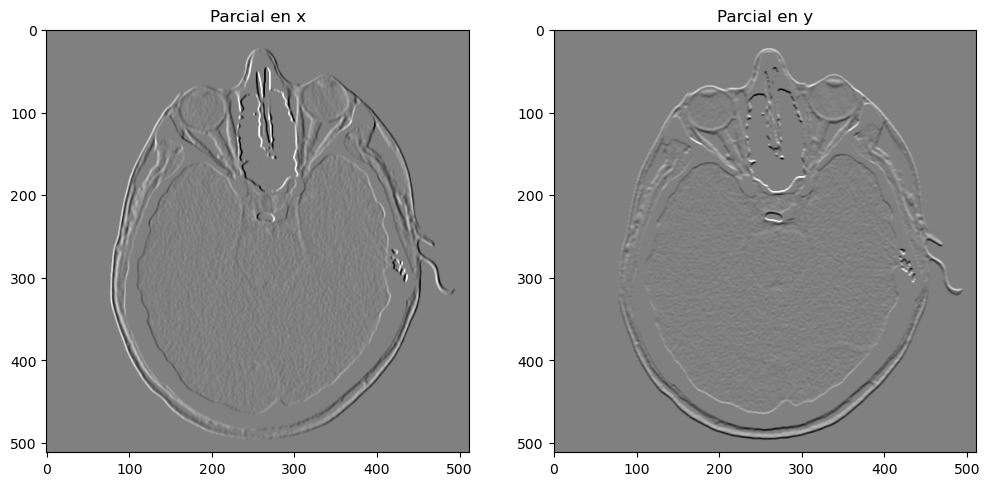

In [212]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(img2,1), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(prewitt(img2,0), cmap='gray')
plt.title('Parcial en y')

Ahora, igual que en el ejemplo anterior, lo haremos mediante laplacianas

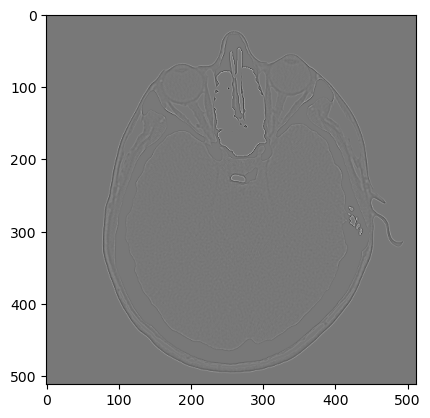

In [213]:
img_lpl2 = laplace(img2)
plt.imshow(img_lpl2, cmap='gray')

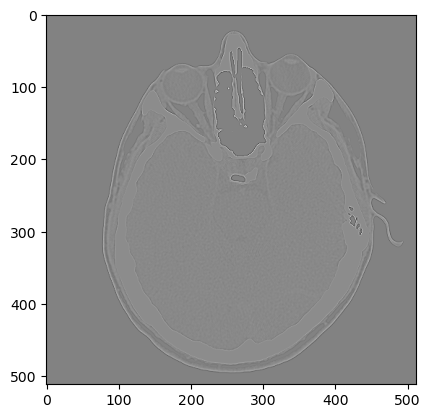

In [214]:
alpha=5
#Este valor puede variar entre 0 y 255, así observaremos el efecto, a mayor nivel de alpha,
# mayor es el efecto de la difuminación del borde mediante la laplaciana
img_real2 = img2 - alpha*img_lpl2

plt.imshow(img_real2, cmap='gray')

Como se puede observar, la detección de bordes mediante laplacianas para imágenes con más ruido y cuyos bordes no están tan definidos, no es tan eficaz, podemos diferenciar los bordes de igual manera, pero no es tan divisorio como en el caso de la imagen de las bandas de grises. 

En cambio, el operador de gradiente, es capaz de diferenciar mejor el borde del edificio y del tag, se diferencia en un tono más claro en ambas ocasiones, los bordes de las figuras que pertenecen a la imagen.

Esto se debe a que la segunda derivada, es demasiado para este tipo de imagenes puesto que el fondo  e incluso componentes de la figura principal de la imagen están mezclados en distintos tonos de grises en varios pixeles consecutivos.

#### 6) Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores anteriores. ¿Podemos ahora detectar los bordes? Discutir el resultado

Text(0.5, 1.0, 'F. Gaussiano CT - Desviación: 1 ')

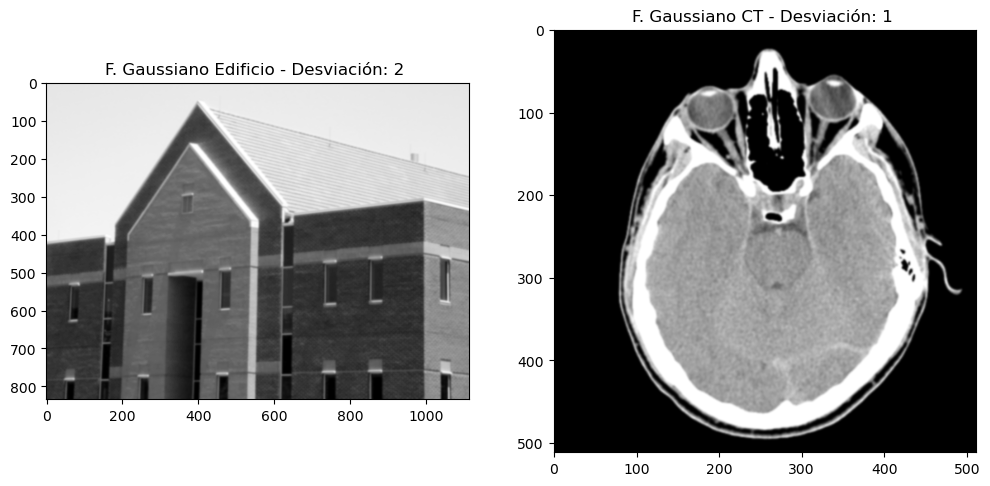

In [215]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
img_gau = gaussian_filter(img, 2)
plt.imshow(img_gau, cmap='gray')
plt.title('F. Gaussiano Edificio - Desviación: 2 ')

plt.subplot(122)
img_gau2 = gaussian_filter(img2, 1)
plt.imshow(img_gau2, cmap='gray')
plt.title('F. Gaussiano CT - Desviación: 1 ')

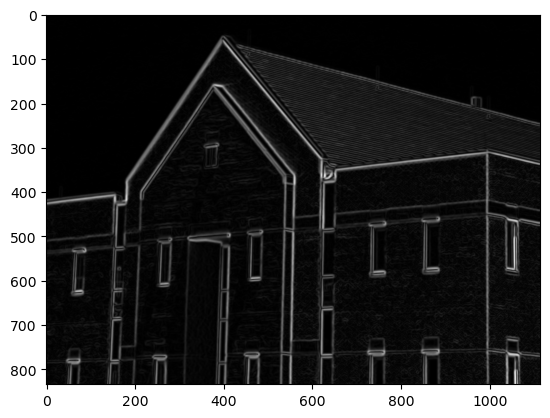

In [216]:
img_gxG = convolve(img_gau, gx)
img_gyG = convolve(img_gau, gy)

img_prewitt = np.sqrt(img_gxG**2 + img_gyG**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

Text(0.5, 1.0, 'Parcial en y')

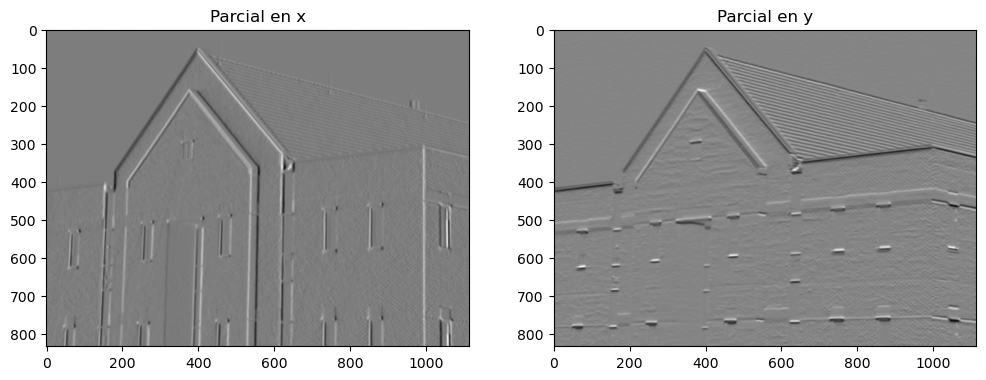

In [217]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(img_gau,1), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(prewitt(img_gau,0), cmap='gray')
plt.title('Parcial en y')

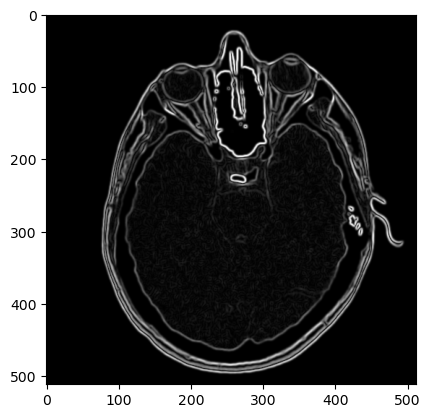

In [218]:
img_gxG2 = convolve(img_gau2, gx)
img_gyG2 = convolve(img_gau2, gy)

img_prewitt = np.sqrt(img_gxG2**2 + img_gyG2**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

Text(0.5, 1.0, 'Parcial en y')

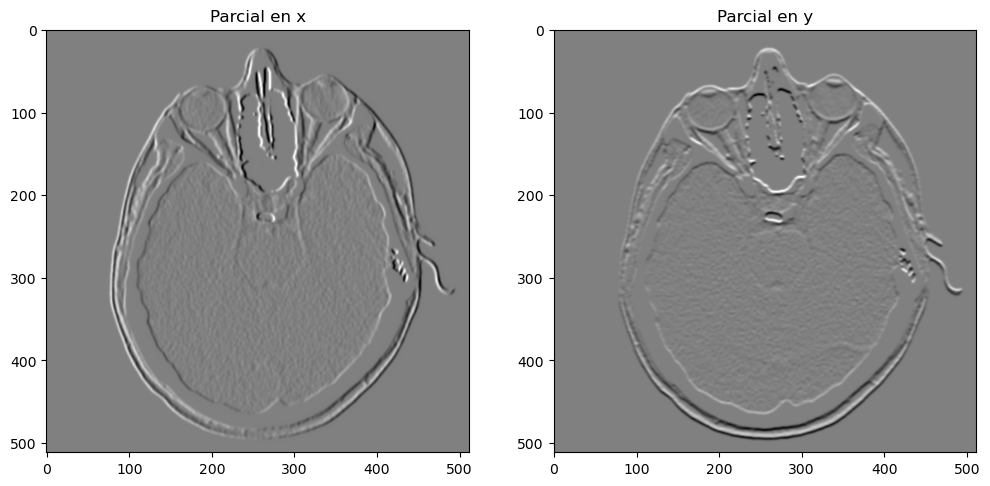

In [219]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(img_gau2,1), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(prewitt(img_gau2,0), cmap='gray')
plt.title('Parcial en y')

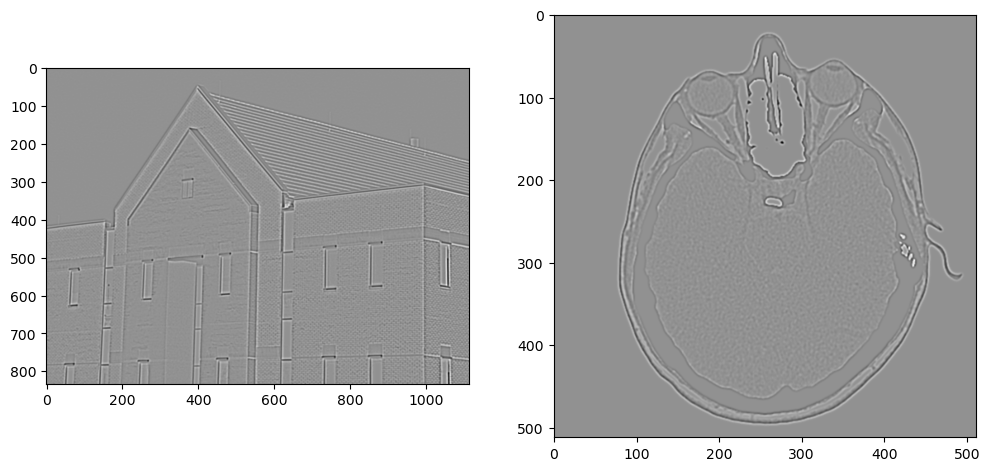

In [220]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
img_lplgau = laplace(img_gau)
plt.imshow(img_lplgau, cmap='gray')

plt.subplot(122)
img_lplgau2 = laplace(img_gau2)
plt.imshow(img_lplgau2, cmap='gray')

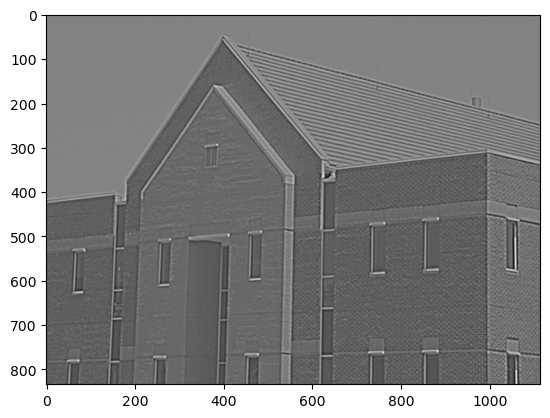

In [221]:
alpha=30
#Este valor puede variar entre 0 y 255, así observaremos el efecto, a mayor nivel de alpha,
# mayor es el efecto de la difuminación del borde mediante la laplaciana
img_realgau = img_gau - alpha*img_lplgau

plt.imshow(img_realgau, cmap='gray')

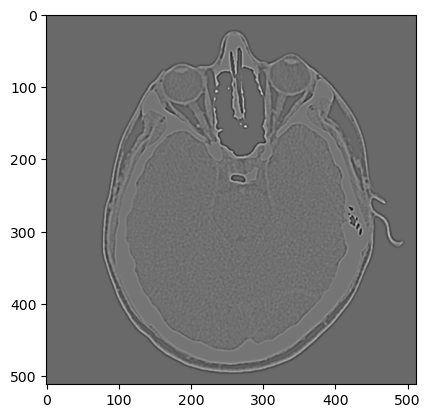

In [222]:
alpha=20
#Este valor puede variar entre 0 y 255, así observaremos el efecto, a mayor nivel de alpha,
# mayor es el efecto de la difuminación del borde mediante la laplaciana
img_realgau2 = img_gau2 - alpha*img_lplgau2

plt.imshow(img_realgau2, cmap='gray')

Al utilizar un filtro gaussiano en las imágenes con más ruido, el propio filtro se encarga de eliminar el propio ruido de las imágenes que como en este caso, no tienen los tonos de blanco y negro tan definidos. 

Por lo tanto, en este caso ambos operador sí realizan su función, es mucho más notorio el cambio y lo podemos comprobar poniendo las 4 imágenes a continuación.

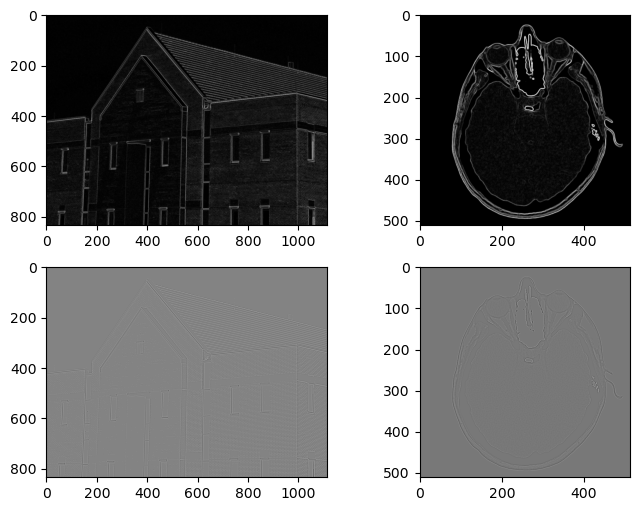

In [223]:
#Imágenes SIN Filtro Gaussiano Previo

plt.figure(figsize=(8, 6))

plt.subplot(221)
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

plt.subplot(222)
img_prewitt = np.sqrt(img_gx2**2 + img_gy2**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

plt.subplot(223)
img_lpl = laplace(img)
plt.imshow(img_lpl, cmap='gray')

plt.subplot(224)
img_lpl2 = laplace(img2)
plt.imshow(img_lpl2, cmap='gray')

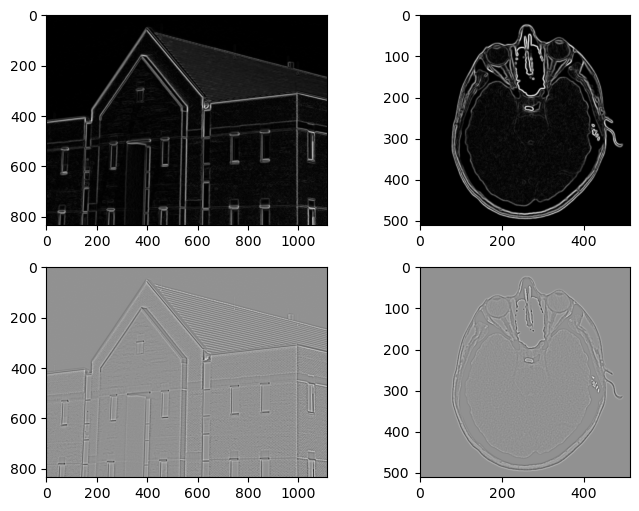

In [224]:
#Imágenes CON Filtro Gaussiano Previo

plt.figure(figsize=(8, 6))

plt.subplot(221)
img_prewitt = np.sqrt(img_gxG**2 + img_gyG**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

plt.subplot(222)
img_prewitt = np.sqrt(img_gxG2**2 + img_gyG2**2)
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

plt.subplot(223)
img_lplgau = laplace(img_gau)
plt.imshow(img_lplgau, cmap='gray')

plt.subplot(224)
img_lplgau2 = laplace(img_gau2)
plt.imshow(img_lplgau2, cmap='gray')

#### 7) La detección de bordes se resuelve con métodos que se fundamentan en lo visto en los apartados anteriores. Un algoritmo muy conocido es el detector de Canny, que se ha presentado en clase. Aplicarlo a las dos imágenes reales (building.tif y head_CT.tif). Discutir el resultado y los parámetros empleados

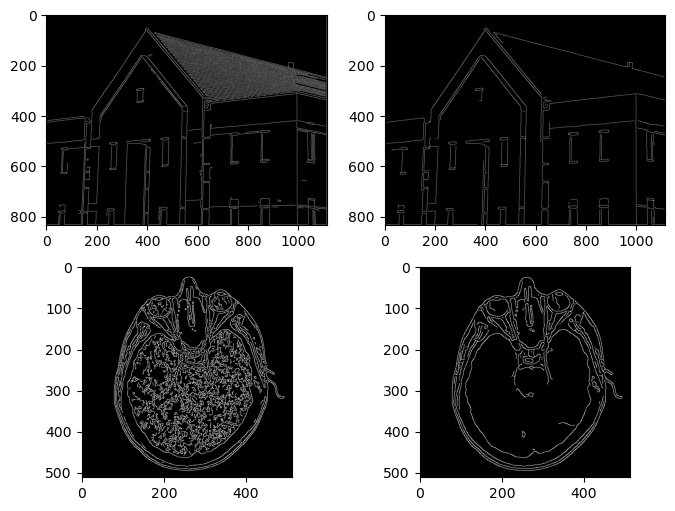

In [257]:
ImgBuild = Image.open('images/building.tif')
ImgBuild = np.array(ImgBuild, dtype = 'uint8')
edges1 = feature.canny(ImgBuild, sigma=2) #podemos variar los valores de sigma
edges2 = feature.canny(ImgBuild, sigma=3)

ImgCT = Image.open('images/head_CT.tif')
ImgCT = np.array(ImgCT, dtype = 'uint8')
edges3 = feature.canny(ImgCT, sigma=1)
edges4 = feature.canny(ImgCT, sigma=1.9)

plt.figure(figsize=(8, 6))


plt.subplot(221)
plt.imshow(edges1, cmap = 'gray')

plt.subplot(222)
plt.imshow(edges2, cmap = 'gray')

plt.subplot(223)
plt.imshow(edges3, cmap = 'gray')

plt.subplot(224)
plt.imshow(edges4, cmap = 'gray')


Con este método de detección perteneciente a skimage, el objetivo es el mismo que con los operadores anteriores, quedarnos con los bordes de las imágenes. En este caso mientras mayor sea el valor de sigma, los bordes que forman la silueta principal de la imagen irán apereciendo por nivel de relevancia.

Con esto, vemos que si el valor de sigma es mayor que 2, los bordes de los objetos más èqueños de la imagen van desapareciendo. Lo ideal para el uso de este método de detección, es usarlo junto con el método de sobel